In [20]:
!pip install yfinance

     -------------------------------------- 59.2/59.2 kB 261.7 kB/s eta 0:00:00
     -------------------------------------- 112.2/112.2 kB 1.3 MB/s eta 0:00:00
     -------------------------------------- 499.4/499.4 kB 2.2 MB/s eta 0:00:00
  Attempting uninstall: pytz
    Found existing installation: pytz 2022.1
    Uninstalling pytz-2022.1:
      Successfully uninstalled pytz-2022.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.20 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.20 requires nbformat==5.4.0, but you have nbformat 5.5.0 which is incompatible.

[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [21]:
import yfinance as yfin

In [37]:
df_cisco = yfin.download('CSCO', start = '2003-2-1' , end = '2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [38]:
df_cisco.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2003-02-03,13.52,13.80,13.38,13.48,9.496675,65976600
2003-02-04,13.24,13.24,12.87,13.20,9.299413,110586200
2003-02-05,13.31,13.60,13.10,13.20,9.299413,115080200
2003-02-06,13.11,13.41,13.07,13.24,9.327594,58738900
2003-02-07,13.34,13.44,12.66,12.85,9.052840,69851700


In [39]:
df_cisco.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-24,47.490002,48.020000,47.060001,47.810001,47.810001,14872700
2023-01-25,47.980000,48.080002,47.230000,47.980000,47.980000,14638700
2023-01-26,48.150002,48.470001,47.830002,48.340000,48.340000,12952700
2023-01-27,48.099998,48.730000,47.970001,48.509998,48.509998,13414200
2023-01-30,48.139999,48.500000,48.119999,48.220001,48.220001,19261900


In [43]:
df_cisco.to_csv('cisco20yrs.csv', index=False)

In [44]:
df_cisco.shape

(5033, 6)

In [42]:
df_cisco.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Using only the Close values

In [45]:
df1=df_cisco.reset_index()['Close']

In [46]:
df1.head()

0    13.48
1    13.20
2    13.20
3    13.24
4    12.85
Name: Close, dtype: float64

### Visualizing the data

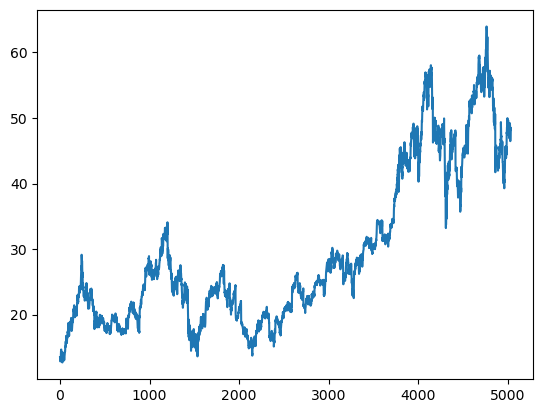

In [47]:
import matplotlib.pyplot as plt
plt.plot(df1)

### Scaling the data

In [49]:
import numpy as np

In [50]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

### Train Test Split

In [52]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [53]:
training_size,test_size

(3271, 1762)

In [54]:
# Converting array to dataframe


def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [57]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [58]:
print(X_train.shape), print(y_train.shape)

(3170, 100)
(3170,)


(None, None)

In [59]:
print(X_test.shape), print(ytest.shape)

(1661, 100)
(1661,)


(None, None)

In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

## LSTM

In [63]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
!pip install tensorflow


[notice] A new release of pip available: 22.2.2 -> 23.0
[notice] To update, run: python.exe -m pip install --upgrade pip



     ------------------------------------ 266.3/266.3 MB 486.5 kB/s eta 0:00:00
     -------------------------------------- 895.9/895.9 kB 6.3 MB/s eta 0:00:00
     ---------------------------------------- 23.2/23.2 MB 7.4 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 7.7 MB/s eta 0:00:00
  Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
  Using cached gast-0.4.0-py3-none-any.whl (9.8 kB)
     -------------------------------------- 126.5/126.5 kB 2.5 MB/s eta 0:00:00
  Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
     ---------------------------------------- 1.5/1.5 MB 8.6 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 6.0 MB/s eta 0:00:00
     ---------------------------------------- 3.7/3.7 MB 8.8 MB/s eta 0:00:00
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
     -------------------------------------- 439.2/439.2 kB 6.8 MB/s eta 0:00:00
     -------------------------------------- 177.8/177.8 kB

In [64]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [65]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [66]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
50/50 [==============================] - 45s 593ms/step - loss: 0.0038 - val_loss: 0.0018
Epoch 2/100
50/50 [==============================] - 26s 522ms/step - loss: 4.5931e-04 - val_loss: 0.0014
Epoch 3/100
50/50 [==============================] - 26s 527ms/step - loss: 4.0243e-04 - val_loss: 0.0015
Epoch 4/100
50/50 [==============================] - 27s 531ms/step - loss: 3.7524e-04 - val_loss: 0.0012
Epoch 5/100
50/50 [==============================] - 26s 526ms/step - loss: 3.3155e-04 - val_loss: 0.0015
Epoch 6/100
50/50 [==============================] - 26s 523ms/step - loss: 3.0877e-04 - val_loss: 9.0638e-04
Epoch 7/100
50/50 [==============================] - 26s 527ms/step - loss: 2.8224e-04 - val_loss: 7.9674e-04
Epoch 8/100
50/50 [==============================] - 26s 530ms/step - loss: 2.4957e-04 - val_loss: 7.2311e-04
Epoch 9/100
50/50 [==============================] - 28s 562ms/step - loss: 2.3726e-04 - val_loss: 7.7980e-04
Epoch 10/100
50/50 [==============

50/50 [==============================] - 27s 535ms/step - loss: 6.7310e-05 - val_loss: 6.1380e-04
Epoch 76/100
50/50 [==============================] - 27s 536ms/step - loss: 7.5973e-05 - val_loss: 4.5351e-04
Epoch 77/100
50/50 [==============================] - 26s 530ms/step - loss: 7.2201e-05 - val_loss: 0.0012
Epoch 78/100
50/50 [==============================] - 27s 534ms/step - loss: 7.4676e-05 - val_loss: 0.0011
Epoch 79/100
50/50 [==============================] - 27s 532ms/step - loss: 8.0357e-05 - val_loss: 3.3582e-04
Epoch 80/100
50/50 [==============================] - 26s 530ms/step - loss: 6.6833e-05 - val_loss: 5.6537e-04
Epoch 81/100
50/50 [==============================] - 27s 535ms/step - loss: 7.0464e-05 - val_loss: 5.3097e-04
Epoch 82/100
50/50 [==============================] - 27s 535ms/step - loss: 6.8203e-05 - val_loss: 0.0010
Epoch 83/100
50/50 [==============================] - 26s 529ms/step - loss: 6.8728e-05 - val_loss: 0.0010
Epoch 84/100
50/50 [==========

### Prediction and Performance Evaluation

In [67]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

52/52 [==============================] - 9s 180ms/step


In [68]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [70]:
import math
from sklearn.metrics import mean_squared_error
mean_squared_error(y_train,train_predict)

501.4793056745702

In [71]:
math.sqrt(mean_squared_error(y_train,train_predict))

22.393733625158852

In [72]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

43.255363350846025

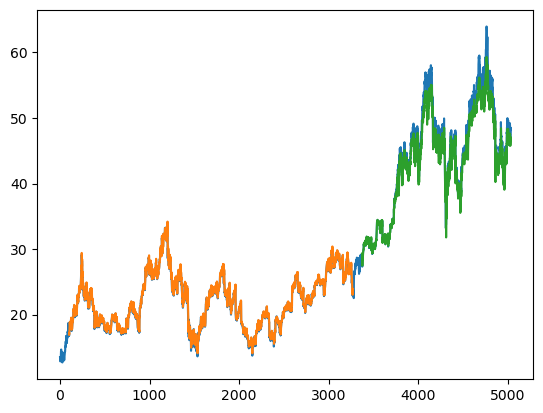

In [75]:
import numpy as np
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

### Future Prediction

In [76]:
len(test_data)

1762

In [78]:
x_input=test_data[1662:].reshape(1,-1)
x_input.shape

(1, 100)

In [79]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [80]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.6649243]
101
1 day input [0.63740978 0.64521165 0.65749956 0.61283404 0.60990832 0.59684029
 0.5970353  0.5970353  0.58299205 0.56368248 0.55510049 0.54554321
 0.54398289 0.54281258 0.55880634 0.5437878  0.53267019 0.55783112
 0.56816853 0.57148435 0.56231717 0.53793644 0.53052467 0.5244783
 0.51843185 0.544568   0.53657112 0.55802613 0.56758341 0.56933883
 0.56602301 0.58728301 0.60171644 0.61771019 0.61810029 0.61888042
 0.64267603 0.63858009 0.6391652  0.62180613 0.60776281 0.62083092
 0.62141603 0.62258633 0.60893311 0.64306613 0.62609716 0.62512195
 0.62824268 0.6182953  0.6612054  0.68461092 0.6812951  0.69611862
 0.69982447 0.69650872 0.69026726 0.69416812 0.72225477 0.72713091
 0.72186467 0.71464799 0.70021457 0.69221769 0.70801643 0.69767895
 0.7140628  0.72069437 0.7140628  0.69163258 0.68500102 0.67700414
 0.67641895 0.6820753  0.67544374 0.67856447 0.67953968 0.67056759
 0.67895457 0.6816852  0.68753656 0.67992978 0.66686175 0.69494832
 0.70001956 0.7045056  0.71230739 0

8 day output [[0.5703707]]
9 day input [0.58299205 0.56368248 0.55510049 0.54554321 0.54398289 0.54281258
 0.55880634 0.5437878  0.53267019 0.55783112 0.56816853 0.57148435
 0.56231717 0.53793644 0.53052467 0.5244783  0.51843185 0.544568
 0.53657112 0.55802613 0.56758341 0.56933883 0.56602301 0.58728301
 0.60171644 0.61771019 0.61810029 0.61888042 0.64267603 0.63858009
 0.6391652  0.62180613 0.60776281 0.62083092 0.62141603 0.62258633
 0.60893311 0.64306613 0.62609716 0.62512195 0.62824268 0.6182953
 0.6612054  0.68461092 0.6812951  0.69611862 0.69982447 0.69650872
 0.69026726 0.69416812 0.72225477 0.72713091 0.72186467 0.71464799
 0.70021457 0.69221769 0.70801643 0.69767895 0.7140628  0.72069437
 0.7140628  0.69163258 0.68500102 0.67700414 0.67641895 0.6820753
 0.67544374 0.67856447 0.67953968 0.67056759 0.67895457 0.6816852
 0.68753656 0.67992978 0.66686175 0.69494832 0.70001956 0.7045056
 0.71230739 0.70821144 0.70587092 0.69026726 0.66725185 0.65866978
 0.66491124 0.67895457 0.6850

16 day output [[0.51829535]]
17 day input [0.53267019 0.55783112 0.56816853 0.57148435 0.56231717 0.53793644
 0.53052467 0.5244783  0.51843185 0.544568   0.53657112 0.55802613
 0.56758341 0.56933883 0.56602301 0.58728301 0.60171644 0.61771019
 0.61810029 0.61888042 0.64267603 0.63858009 0.6391652  0.62180613
 0.60776281 0.62083092 0.62141603 0.62258633 0.60893311 0.64306613
 0.62609716 0.62512195 0.62824268 0.6182953  0.6612054  0.68461092
 0.6812951  0.69611862 0.69982447 0.69650872 0.69026726 0.69416812
 0.72225477 0.72713091 0.72186467 0.71464799 0.70021457 0.69221769
 0.70801643 0.69767895 0.7140628  0.72069437 0.7140628  0.69163258
 0.68500102 0.67700414 0.67641895 0.6820753  0.67544374 0.67856447
 0.67953968 0.67056759 0.67895457 0.6816852  0.68753656 0.67992978
 0.66686175 0.69494832 0.70001956 0.7045056  0.71230739 0.70821144
 0.70587092 0.69026726 0.66725185 0.65866978 0.66491124 0.67895457
 0.68500102 0.68831676 0.69533842 0.69865417 0.69299789 0.66492432
 0.63821185 0.624234

24 day output [[0.48289415]]
25 day input [0.51843185 0.544568   0.53657112 0.55802613 0.56758341 0.56933883
 0.56602301 0.58728301 0.60171644 0.61771019 0.61810029 0.61888042
 0.64267603 0.63858009 0.6391652  0.62180613 0.60776281 0.62083092
 0.62141603 0.62258633 0.60893311 0.64306613 0.62609716 0.62512195
 0.62824268 0.6182953  0.6612054  0.68461092 0.6812951  0.69611862
 0.69982447 0.69650872 0.69026726 0.69416812 0.72225477 0.72713091
 0.72186467 0.71464799 0.70021457 0.69221769 0.70801643 0.69767895
 0.7140628  0.72069437 0.7140628  0.69163258 0.68500102 0.67700414
 0.67641895 0.6820753  0.67544374 0.67856447 0.67953968 0.67056759
 0.67895457 0.6816852  0.68753656 0.67992978 0.66686175 0.69494832
 0.70001956 0.7045056  0.71230739 0.70821144 0.70587092 0.69026726
 0.66725185 0.65866978 0.66491124 0.67895457 0.68500102 0.68831676
 0.69533842 0.69865417 0.69299789 0.66492432 0.63821185 0.62423432
 0.61475211 0.60530096 0.59584218 0.58684337 0.5783813  0.57037067
 0.56274337 0.555466

In [81]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [82]:
len(df1)

5033

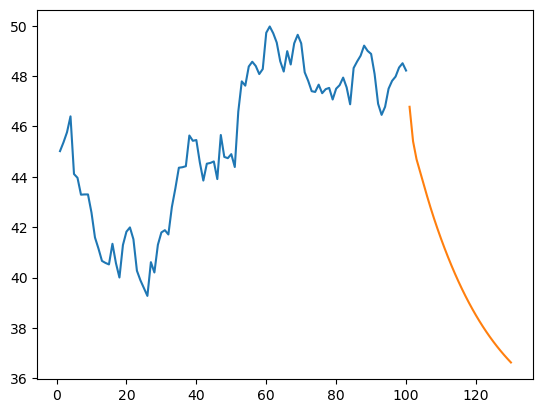

In [83]:
plt.plot(day_new,scaler.inverse_transform(df1[4933:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

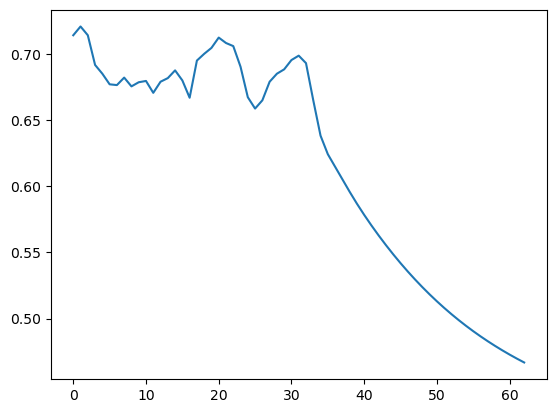

In [84]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[5000:])

In [85]:
df3=scaler.inverse_transform(df3).tolist()

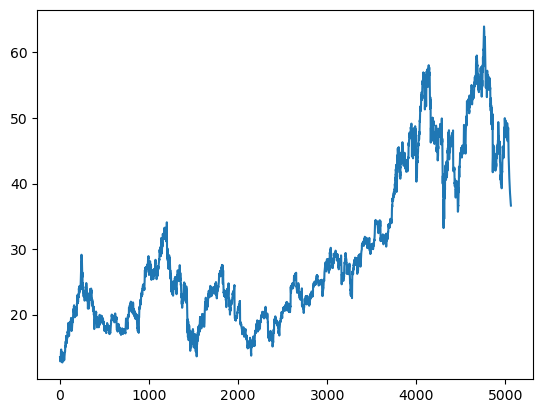

In [86]:
plt.plot(df3)

In [87]:
model.save("investment_lstm_model.h5")

### Dataset Creation

In [98]:
df_cisco.to_csv('CISCO.csv', index = False)

In [88]:
df_apple = yfin.download('AAPL', start = '2003-2-1' , end = '2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [94]:
df_apple.to_csv('APPLE.csv', index=False)

In [89]:
df_infosys = yfin.download('INFY', start = '2003-2-1' , end = '2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [95]:
df_infosys.to_csv('INFOSYS.csv', index=False)

In [92]:
df_google = yfin.download('GOOGL', start = '2003-2-1' , end = '2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [96]:
df_google.to_csv('GOOGLE.csv', index=False)

In [93]:
df_amazon = yfin.download('AMZN', start = '2003-2-1' , end = '2023-1-31')

[*********************100%***********************]  1 of 1 completed


In [97]:
df_amazon.to_csv('AMAZON.csv', index=False)